# Dense Neural Network (DNN)

## Import Libraries and Load Dataset

In [1]:
# Import staandard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for the modeling.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the data
df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Github\Data\minimal_withoutfc_dupesdropped_frequencies_area_removedskew_outliers3_0_NoW_tn20_mcp00.10.parquet')


Data Preparation

In [2]:
# Step 1: Split data into features and target

target_column = 'Ewltp (g/km)'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Step 2: Scale numerical features (assuming X is already preprocessed with
#         categorical encoding)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable as well (optional but can be helpful)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Further split X_train_scaled and y_train_scaled into training and
#         validation sets
X_train_partial, X_val, y_train_partial, y_val = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.2, random_state=42)


## Modelling and summary

# Step 4: Build the Neural Network Model

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)), # Explicitly define the input shape
    Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout layer to reduce overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression output
])

# Compile the model with MSE as the loss function and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Step 5: Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

# Step 6: Train the Model
history = model.fit(
    X_train_partial, y_train_partial,
    validation_data=(X_val, y_val),
    epochs=20,              # Reduced epochs - help manage memory usage.
    batch_size=16,          # Smaller batch size- help manage memory usage.
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1
)


Epoch 1/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 102s 1ms/step - loss: 0.1037 - mse: 0.1037 - val_loss: 0.0666 - val_mse: 0.0666
Epoch 2/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 107s 1ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0882 - val_mse: 0.0882
Epoch 3/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 140s 1ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 4/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 105s 1ms/step - loss: 0.0558 - mse: 0.0558 - val_loss: 0.0648 - val_mse: 0.0648
Epoch 5/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - loss: 0.0545 - mse: 0.0545 - val_loss: 0.0623 - val_mse: 0.0623
Epoch 6/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - loss: 0.0537 - mse: 0.0537 - val_loss: 0.0637 - val_mse: 0.0637
Epoch 7/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 104s 1ms/step - loss: 0.0535 - mse: 0.0535 - val_loss: 0.0815 - val_mse: 0.0815
Epoch 8/20
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 101s 1ms/step - loss: 0.0533 - mse: 0.0533 - val_loss: 0.0670 - val_mse: 0.0670
Epoch 9/

In [4]:
# Step 7: Evaluate the Model on the Test Set

# Transform the predictions back to the original scale
y_train_pred = scaler_y.inverse_transform(model.predict(X_train_scaled).flatten().reshape(-1, 1))
y_test_pred = scaler_y.inverse_transform(model.predict(X_test_scaled).flatten().reshape(-1, 1))

# Transform y_train and y_test back to the original scale
y_train_orig = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

train_mse = mean_squared_error(y_train_orig, y_train_pred)
test_mse_DNN1 = mean_squared_error(y_test_orig, y_test_pred)
train_r2 = r2_score(y_train_orig, y_train_pred)
test_r2_DNN1 = r2_score(y_test_orig, y_test_pred)

print(f"Training MSE: {train_mse:.3}")
print(f"Test MSE DNN1: {test_mse_DNN1:.3}")
print(f"Training R-squared: {train_r2:.3}")
print(f"Test R-squared DNN1: {test_r2_DNN1:.3}")

# [Vic]
# Training MSE: 59.9
# Test MSE DNN1: 60.2
# Training R-squared: 0.937
# Test R-squared DNN1: 0.937

50012/50012 ━━━━━━━━━━━━━━━━━━━━ 43s 849us/step
12503/12503 ━━━━━━━━━━━━━━━━━━━━ 11s 849us/step
Training MSE: 53.3
Test MSE DNN1: 53.7
Training R-squared: 0.944
Test R-squared DNN1: 0.943


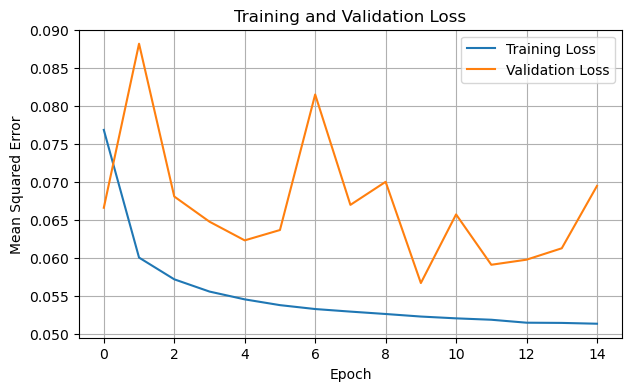

In [5]:
# Step 8: Plot Training and Validation Loss
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Dense Neural Network (DNN) second attempt 

Explanation of Modifications:
- L2 Regularization (Ridge): Added to each dense layer to penalize large weights, which helps control overfitting by encouraging the model to keep weights small.
- Increased Dropout: Raised the dropout rate to 0.3 to further reduce overfitting by randomly dropping more neurons during training.
- Early Stopping: Retained early stopping to halt training if the validation loss does not improve, helping avoid unnecessary epochs.
Interpretation
If these adjustments do not fully address the overfitting, you could further increase the regularization strength (increase the l2 parameter) or add more layers with lower complexity (e.g., fewer neurons).

In [1]:
# Import staandard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for the modeling.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the data
df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Github\Data\minimal_withoutfc_dupesdropped_frequencies_area_removedskew_outliers3_0_NoW_tn20_mcp00.10.parquet')

In [2]:
# Assuming df is already loaded with your dataset
target_column = 'Ewltp (g/km)' 
X = df.drop(columns=[target_column]) 
y = df[target_column]

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale numerical features (assuming X is already preprocessed with categorical encoding)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable as well (optional but can be helpful)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Further split X_train_scaled and y_train_scaled into training and validation sets
X_train_partial, X_val, y_train_partial, y_val = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.2, random_state=42
)

# Step 4: Build the Neural Network Model with regularization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Explicitly define the input shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Increased dropout rate
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dense(1)  # Output layer with one neuron for regression output
])

# Compile the model with MSE as the loss function and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Step 5: Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

# Step 6: Train the Model
history = model.fit(
    X_train_partial, y_train_partial,
    validation_data=(X_val, y_val),
    epochs=50,           # Keep epochs high, early stopping will manage overfitting
    batch_size=16,       # Smaller batch size - helps manage memory usage
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1
)

# Step 7: Evaluate the Model on the Test Set

# Transform the predictions back to the original scale
y_train_pred = scaler_y.inverse_transform(model.predict(X_train_scaled).flatten().reshape(-1, 1))
y_test_pred = scaler_y.inverse_transform(model.predict(X_test_scaled).flatten().reshape(-1, 1))

# Transform y_train and y_test back to the original scale
y_train_orig = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

train_mse = mean_squared_error(y_train_orig, y_train_pred)
test_mse_DNN2 = mean_squared_error(y_test_orig, y_test_pred)
train_r2 = r2_score(y_train_orig, y_train_pred)
test_r2_DNN2 = r2_score(y_test_orig, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE DNN2: {test_mse_DNN2}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared DNN2: {test_r2_DNN2}")

Epoch 1/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 104s 1ms/step - loss: 0.1108 - mse: 0.0916 - val_loss: 0.1308 - val_mse: 0.1115
Epoch 2/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 105s 1ms/step - loss: 0.1110 - mse: 0.0918 - val_loss: 0.1150 - val_mse: 0.0960
Epoch 3/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 105s 1ms/step - loss: 0.1110 - mse: 0.0918 - val_loss: 0.1093 - val_mse: 0.0904
Epoch 4/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 104s 1ms/step - loss: 0.1106 - mse: 0.0914 - val_loss: 0.1122 - val_mse: 0.0930
Epoch 5/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 105s 1ms/step - loss: 0.1110 - mse: 0.0917 - val_loss: 0.1061 - val_mse: 0.0865
Epoch 6/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - loss: 0.1108 - mse: 0.0914 - val_loss: 0.1461 - val_mse: 0.1270
Epoch 7/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - loss: 0.1107 - mse: 0.0914 - val_loss: 0.1357 - val_mse: 0.1165
Epoch 8/50
80018/80018 ━━━━━━━━━━━━━━━━━━━━ 106s 1ms/step - loss: 0.1103 - mse: 0.0909 - val_loss: 0.1091 - val_mse: 0.0898
Epoch 9/

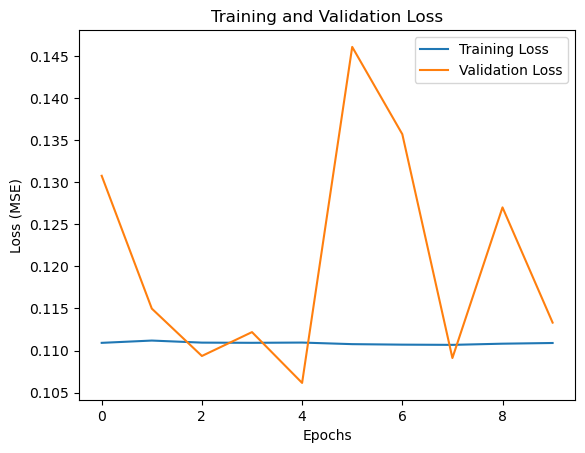

In [5]:
# Step 7: Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Dense Neural Network (DNN) third attempt

Explanation of Modifications:

- Batch size 32: (Start with a batch size of around 32 and observe the training and validation losses. If you still see overfitting around epoch 3, try increasing it gradually (32 → 64 → 128).)

In [1]:
# Import staandard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for the modeling.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the data
df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Github\Data\minimal_withoutfc_dupesdropped_frequencies_area_removedskew_outliers3_0_NoW_tn20_mcp00.10.parquet')

In [2]:
# Assuming df is already loaded with your dataset
target_column = 'Ewltp (g/km)' 
X = df.drop(columns=[target_column]) 
y = df[target_column]

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale numerical features (assuming X is already preprocessed with categorical encoding)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable as well (optional but can be helpful)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Further split X_train_scaled and y_train_scaled into training and validation sets
X_train_partial, X_val, y_train_partial, y_val = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.3, random_state=42
)

# Step 4: Build the Neural Network Model with regularization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Explicitly define the input shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Increased dropout rate
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dense(1)  # Output layer with one neuron for regression output
])

# Compile the model with MSE as the loss function and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Step 5: Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

# Step 6: Train the Model
history = model.fit(
    X_train_partial, y_train_partial,
    validation_data=(X_val, y_val),
    epochs=50,           # Keep epochs high, early stopping will manage overfitting
    batch_size=32,       # Smaller batch size - helps manage memory usage
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1
)

# Step 7: Evaluate the Model on the Test Set

# Transform the predictions back to the original scale
y_train_pred = scaler_y.inverse_transform(model.predict(X_train_scaled).flatten().reshape(-1, 1))
y_test_pred = scaler_y.inverse_transform(model.predict(X_test_scaled).flatten().reshape(-1, 1))

# Transform y_train and y_test back to the original scale
y_train_orig = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

train_mse = mean_squared_error(y_train_orig, y_train_pred)
test_mse_DNN3 = mean_squared_error(y_test_orig, y_test_pred)
train_r2 = r2_score(y_train_orig, y_train_pred)
test_r2_DNN3 = r2_score(y_test_orig, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse_DNN3}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2_DNN3}")

Epoch 1/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 58s 2ms/step - loss: 0.1790 - mse: 0.1315 - val_loss: 0.1072 - val_mse: 0.0886
Epoch 2/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 0.1044 - mse: 0.0861 - val_loss: 0.1024 - val_mse: 0.0847
Epoch 3/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.1036 - mse: 0.0858 - val_loss: 0.1212 - val_mse: 0.1033
Epoch 4/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 0.1038 - mse: 0.0860 - val_loss: 0.1367 - val_mse: 0.1187
Epoch 5/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.1029 - mse: 0.0852 - val_loss: 0.1301 - val_mse: 0.1124
Epoch 6/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 0.1027 - mse: 0.0853 - val_loss: 0.1291 - val_mse: 0.1116
Epoch 7/50
35008/35008 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 0.1020 - mse: 0.0847 - val_loss: 0.1114 - val_mse: 0.0939
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 2.
50012/50012 ━━━━━━━━━━━━━━━━━━━━ 45s 899us/step
12503/12

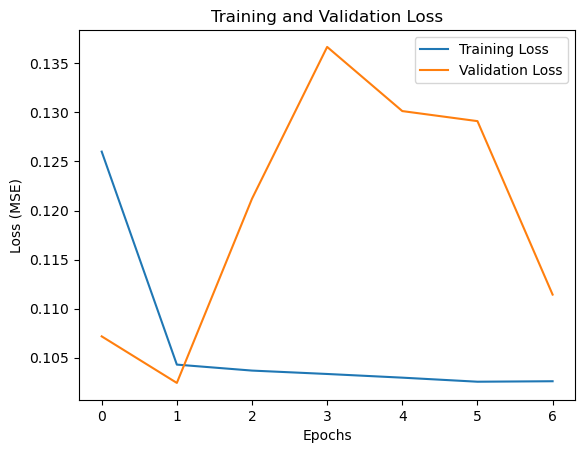

In [4]:
# Step 7: Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Dense Neural Network (DNN) fourth attempt

 Batch size 64: 

In [5]:
# Import staandard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for the modeling.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# enabling the display of all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load the data
df=pd.read_parquet(r'C:\Users\alexa\Downloads\ProjectCO2--no Github\Data\minimal_withoutfc_dupesdropped_frequencies_area_removedskew_outliers3_0_NoW_tn20_mcp00.10.parquet')

In [6]:
# Assuming df is already loaded with your dataset
target_column = 'Ewltp (g/km)' 
X = df.drop(columns=[target_column]) 
y = df[target_column]

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale numerical features (assuming X is already preprocessed with categorical encoding)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable as well (optional but can be helpful)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Step 3: Further split X_train_scaled and y_train_scaled into training and validation sets
X_train_partial, X_val, y_train_partial, y_val = train_test_split(
    X_train_scaled, y_train_scaled, test_size=0.3, random_state=42
)

# Step 4: Build the Neural Network Model with regularization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Explicitly define the input shape
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Increased dropout rate
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dropout(0.3),  # Increased dropout rate
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    Dense(1)  # Output layer with one neuron for regression output
])

# Compile the model with MSE as the loss function and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Display the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 5: Set up early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True, verbose=1
)

# Step 6: Train the Model
history = model.fit(
    X_train_partial, y_train_partial,
    validation_data=(X_val, y_val),
    epochs=50,           # Keep epochs high, early stopping will manage overfitting
    batch_size=64,       # Smaller batch size - helps manage memory usage
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1
)

# Step 7: Evaluate the Model on the Test Set

# Transform the predictions back to the original scale
y_train_pred = scaler_y.inverse_transform(model.predict(X_train_scaled).flatten().reshape(-1, 1))
y_test_pred = scaler_y.inverse_transform(model.predict(X_test_scaled).flatten().reshape(-1, 1))

# Transform y_train and y_test back to the original scale
y_train_orig = scaler_y.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1))

train_mse = mean_squared_error(y_train_orig, y_train_pred)
test_mse_DNN3 = mean_squared_error(y_test_orig, y_test_pred)
train_r2 = r2_score(y_train_orig, y_train_pred)
test_r2_DNN3 = r2_score(y_test_orig, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse_DNN3}")
print(f"Training R-squared: {train_r2}")
print(f"Test R-squared: {test_r2_DNN3}")

Epoch 1/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 0.2110 - mse: 0.1500 - val_loss: 0.0923 - val_mse: 0.0758
Epoch 2/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0997 - mse: 0.0830 - val_loss: 0.0970 - val_mse: 0.0809
Epoch 3/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0977 - mse: 0.0817 - val_loss: 0.0985 - val_mse: 0.0827
Epoch 4/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0967 - mse: 0.0810 - val_loss: 0.0931 - val_mse: 0.0775
Epoch 5/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.0969 - mse: 0.0812 - val_loss: 0.0867 - val_mse: 0.0711
Epoch 6/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0969 - mse: 0.0813 - val_loss: 0.1076 - val_mse: 0.0925
Epoch 7/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.0956 - mse: 0.0802 - val_loss: 0.0928 - val_mse: 0.0773
Epoch 8/50
17504/17504 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0953 - mse: 0.0799 - val_loss: 0.0865 - val_mse: 0.0710
Epoch 9/50
17504

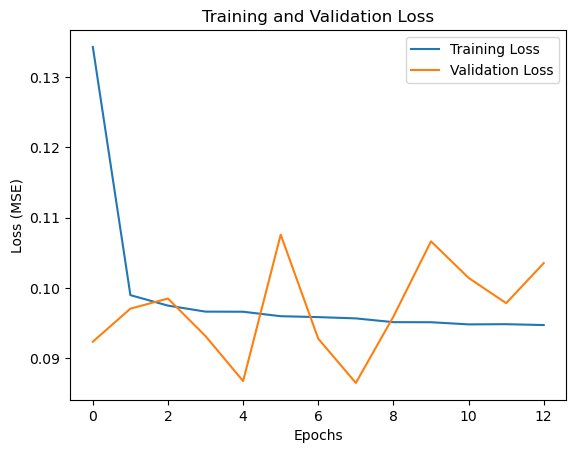

In [8]:
# Step 7: Plot Training and Validation Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Interpretation:

Initial Decrease: Both training and validation loss decrease significantly in the initial epochs, indicating that the model is learning and improving its performance.
Diverging Losses: After a few epochs, the training loss continues to decrease, while the validation loss starts to increase. This is a clear sign of overfitting.
Overfitting: The model is becoming too complex and is starting to memorize the training data rather than learning generalizable patterns. This leads to poor performance on unseen data, as reflected by the increasing validation loss.

A well-trained model should ideally have both training and validation loss decreasing and converging to a low value.

Possible Solutions used to address overfitting:

- Early Stopping: Implement early stopping to stop the training process when the validation loss starts to increase.
- Regularization: Introduce regularization techniques like L1 or L2 regularization to penalize model complexity and prevent overfitting.
- Model Architecture: Experiment with different model architectures, such as using simpler models or adding dropout layers to reduce overfitting.

**
Two further attempts were made to improve the model aiming to have both training and validation loss decreasing and converging to a low value. Modifications were based on:

- L2 Regularization (Ridge): Added to each dense layer to penalize large weights, which helps control overfitting by encouraging the model to keep weights small.
- Increased Dropout: Raised the dropout rate to 0.3 to further reduce overfitting by randomly dropping more neurons during training.
- Early Stopping: Retained early stopping to halt training if the validation loss does not improve, helping avoid unnecessary epochs.
But also:
-	Increasing test size (to 30%) batch size to 32.

Unfortunately, these changes did not improve the model either by significantly increasing the Test-R-squared or by controlling the behavior of the validation loss curve.
